# Arima Modeling Test
Simply just playing around with model and seeing how it works in general - will group by category/group/etc. once we decide the best approach.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [3]:
df = pd.read_excel("SupplyChain_TimeSeriesData.xlsx")

In [4]:
df['scheduled_duration_total'] = df['Schedule Finish Date'] - df['Schedule Start Date']
df['actual_duration_total'] = df['Usage Decision Date'] - df['Confirmation Start Date']

In [5]:
# Using the Pandas bdate_range function, we calculate number of days taken to complete order (excluding weekends)
df['scheduled_duration_nowkend'] = df.apply(lambda row: pd.bdate_range( row['Schedule Start Date'], row['Schedule Finish Date']).shape[0] \
                                            if not pd.isna(row['Schedule Start Date']) and not pd.isna(row['Schedule Finish Date']) else np.nan, axis=1 )
df['actual_duration_nowkend'] = df.apply(lambda row: pd.bdate_range( row['Confirmation Start Date'], row['Usage Decision Date']).shape[0] \
                                         if not pd.isna(row['Confirmation Start Date']) and not pd.isna(row['Usage Decision Date']) else np.nan, axis=1 )

In [56]:
df = df.sort_values(by=['Usage Decision Date'])
df.tail(10)

,Order,Material,Batch,Group,MaterialCategory,Total order quantity,Unit,Quantity of goods received,Schedule Start Date,Schedule Finish Date,Confirmation Start Date,First Goods Movement Date,Goods Receipt Date,Usage Decision Date,dur,scheduled_duration_total,actual_duration_total,scheduled_duration_nowkend,actual_duration_nowkend
8110,132174,100000958,B21912,114,9,30000.0,PC,30000.0,2020-05-29,2020-06-05,2020-05-27,2020-05-27,2020-06-03,2020-06-08,9,7 days,12 days,6,9
33167,132488,100002706,B22225,157,13,9762.0,PC,9756.0,2020-06-05,2020-06-22,2020-06-05,2020-06-01,2020-06-07,2020-06-08,2,17 days,3 days,12,2
28193,132014,100002685,B21761,143,12,2000.0,ML,2246.0,2020-05-22,2020-06-15,2020-05-22,2020-05-26,2020-06-05,2020-06-08,12,24 days,17 days,17,12
28192,131781,100001194,B21556,143,12,1000.0,ML,2175.0,2020-05-21,2020-06-12,2020-05-21,2020-05-21,2020-06-05,2020-06-08,13,22 days,18 days,17,13
31931,131493,100001494,B21277,151,13,400.0,PC,399.0,2020-06-05,2020-06-12,2020-06-04,2020-06-03,2020-06-06,2020-06-08,3,7 days,4 days,6,3
8452,132417,100001520,B22153,115,13,2270.0,PC,2201.0,2020-05-29,2020-06-05,2020-05-29,2020-05-26,2020-05-31,2020-06-08,7,7 days,10 days,6,7
8453,132418,100001520,B22154,115,13,2270.0,PC,2196.0,2020-05-29,2020-06-05,2020-06-01,2020-05-27,2020-06-02,2020-06-08,6,7 days,7 days,6,6
30215,132445,100000179,B22181,144,12,352.0,µMO,235.0,2020-05-21,2020-06-08,2020-05-28,2020-05-28,2020-06-08,2020-06-08,8,18 days,11 days,13,8
33166,132545,100002707,B22277,157,13,2337.0,PC,2336.0,2020-06-04,2020-06-19,2020-06-04,2020-05-30,2020-06-05,2020-06-08,3,15 days,4 days,12,3
12332,132725,100000404,B22458,123,2,6000.0,ML,6000.0,2020-06-02,2020-06-05,2020-05-18,2020-06-01,2020-06-05,2020-06-08,16,3 days,21 days,4,16


In [59]:
df.describe()

,Order,Material,Group,MaterialCategory,Total order quantity,Quantity of goods received,dur,scheduled_duration_total,actual_duration_total,scheduled_duration_nowkend,actual_duration_nowkend
count,33787.000000,3.378700e+04,33787.00000,33787.000000,33787.000000,3.378700e+04,33787.000000,33787,33787,33787.000000,33787.000000
mean,117457.741350,1.000012e+08,128.95226,7.208275,8193.670596,7.922920e+03,20.804333,10 days 08:15:12.066771,27 days 17:27:17.990943,8.450469,20.902803
std,9849.336105,7.045138e+02,15.48948,5.259814,41993.698195,4.255909e+04,40.211975,8 days 04:27:00.000879,56 days 06:46:58.675046,5.785921,39.991622
min,100000.000000,1.000000e+08,100.00000,1.000000,0.050000,0.000000e+00,-373.000000,0 days 00:00:00,-520 days +00:00:00,0.000000,0.000000
25%,109033.500000,1.000006e+08,115.00000,1.000000,74.000000,6.220000e+01,7.000000,6 days 00:00:00,8 days 00:00:00,5.000000,7.000000
50%,117521.000000,1.000011e+08,131.00000,9.000000,604.000000,6.000000e+02,12.000000,8 days 00:00:00,15 days 00:00:00,7.000000,12.000000
75%,125969.500000,1.000018e+08,138.00000,12.000000,3000.000000,2.995000e+03,19.000000,13 days 00:00:00,26 days 00:00:00,10.000000,19.000000
max,134479.000000,1.000027e+08,173.00000,15.000000,950000.000000,1.825670e+06,711.000000,186 days 00:00:00,994 days 00:00:00,133.000000,711.000000


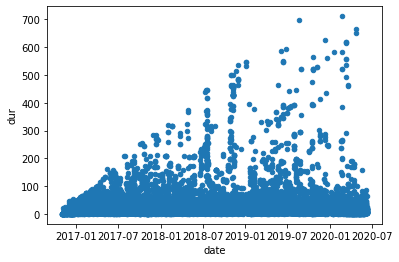

In [63]:
# Series of stamped time-series data
dates = df['Usage Decision Date']
ts = pd.Series( df['actual_duration_nowkend'].values, index=dates)

# Just visualizing data
dfmod = ts.to_frame()
dfmod.reset_index(inplace=True)
dfmod.columns = ['date','dur']
dfmod.plot(kind='scatter',x='date',y='dur')
plt.show()

In [64]:
# Array of external variables
exog_df = pd.DataFrame(df[['Group', 'MaterialCategory', 'Total order quantity']])
"""
# Disregard 
# Mapping units to numbers
units = ['G', 'KU', 'L', 'ML', 'PC', 'µL', 'µMO', 'µg']
for ind, item in enumerate(units):
    exog_df.replace(item, ind)
print(exog_df)
"""
# Convert to values for arima model
exog_arr = exog_df.values


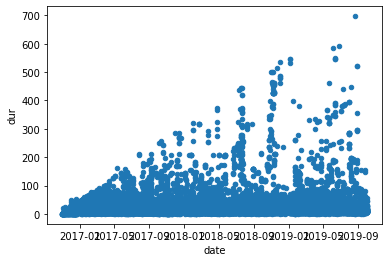

In [75]:
# Splitting data into test/train
ratio = 0.8
length = ts.shape[0]
pivot = int(ratio * length)

ts_train = ts[:pivot]
ts_test = ts[pivot:]

exog_train = exog_arr[:pivot]
exog_test = exog_arr[pivot:]

dates_train = ts[:pivot]
dates_test = ts[pivot:]

# Just visualizing data
dfmod = ts_train.to_frame()
dfmod.reset_index(inplace=True)
dfmod.columns = ['date','dur']
dfmod.plot(kind='scatter',x='date',y='dur')
plt.show()

In [ ]:
# Fitting
arima = pm.auto_arima(ts_train, exog_train, seasonal=True, m=12)

/opt/anaconda3/envs/timeseries/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/timeseries/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/timeseries/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/timeseries/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/timeseries/lib/python3.7/site-packages/stats

In [ ]:
num_test = ts_test.shape[0]
# forecasts
forecasts = arima.predict(n_periods = num_test, exogenous = exog_test)  # predict 

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(length)
s = 2.0 ** 2
plt.scatter(x[:pivot], ts_train, s = s, c='blue')
plt.scatter(x[pivot:], ts_test, s = s, c = 'green')
plt.plot(x[pivot:], forecasts, c='red')
plt.gcf().set_size_inches(15, 12)
plt.title('Duration vs. Date')
plt.show()